In [1]:
import tensorflow as tf
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import seaborn as sn 
import pandas as pd
import matplotlib.pyplot as plt 


X = loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Botswana.mat')['Botswana']
Y= loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Botswana_gt.mat')['Botswana_gt']

x_ = X.reshape((1476*256, 145))
y = Y.reshape((1476*256, 1))
print(x_.shape, y.shape)

(377856, 145) (377856, 1)


In [2]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

x = sc_X.fit_transform(x_)

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.25, random_state=0, stratify=y)

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(15, activation = tf.nn.softmax))


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
import numpy as np
# x_train = np.array(y_train)

In [7]:
model.fit(x_train, y_train, batch_size=256, epochs=150)

Epoch 1/150
1107/1107 [==============================] - 5s 4ms/step - loss: 0.1841 - accuracy: 0.9849
Epoch 2/150
1107/1107 [==============================] - 4s 4ms/step - loss: 0.0527 - accuracy: 0.9913
Epoch 3/150
1107/1107 [==============================] - 4s 4ms/step - loss: 0.0479 - accuracy: 0.9913
Epoch 4/150
1107/1107 [==============================] - 4s 3ms/step - loss: 0.0439 - accuracy: 0.9916
Epoch 5/150
1107/1107 [==============================] - 3s 3ms/step - loss: 0.0425 - accuracy: 0.9914
Epoch 6/150
1107/1107 [==============================] - 3s 3ms/step - loss: 0.0420 - accuracy: 0.9915
Epoch 7/150
1107/1107 [==============================] - 3s 3ms/step - loss: 0.0416 - accuracy: 0.9913
Epoch 8/150
1107/1107 [==============================] - 3s 3ms/step - loss: 0.0407 - accuracy: 0.9914
Epoch 9/150
1107/1107 [==============================] - 3s 3ms/step - loss: 0.0392 - accuracy: 0.9914
Epoch 10/150
1107/1107 [==============================] - 3s 3ms/step - l

In [8]:
y_pred =  model.predict_classes(x_test)

C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[93463,     0,     8,    15,    15,     9,     0,    11,    24,
           12,    16,     8,     5,    59,     7],
       [   67,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   22,     0,     3,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   44,     0,     0,    19,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   44,     0,     0,     0,    10,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   67,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   67,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   54,     0,     0,     0,     0,     0,     0,    11,     0,
            0,     0,     0,     0,     0,     0],
       [   33,     0,   

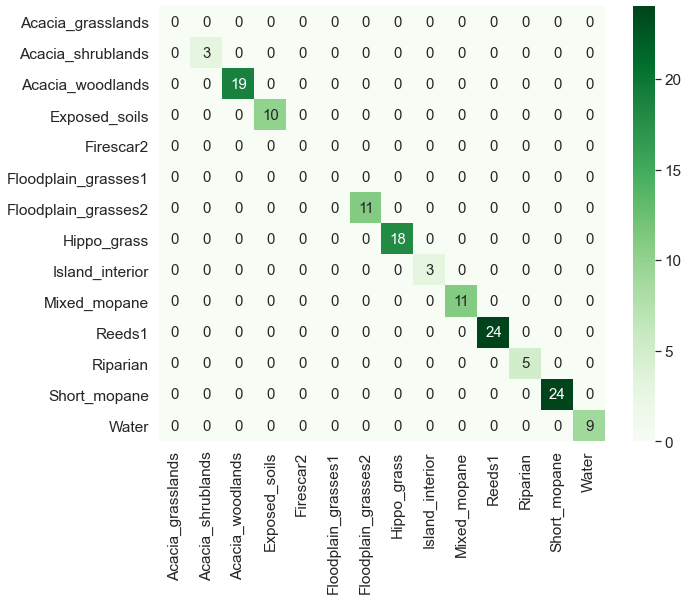

In [12]:
names = ['Water', 'Hippo_grass' ,'Floodplain_grasses1', 'Floodplain_grasses2','Reeds1','Riparian','Firescar2'
,'Island_interior' ,'Acacia_woodlands' ,'Acacia_shrublands','Acacia_grasslands','Short_mopane','Mixed_mopane'
,'Exposed_soils']

df_cm = pd.DataFrame(cm[1:15, 1:15] , columns=np.unique(names), index = np.unique(names))


plt.figure(figsize = (10,8))

sn.set(font_scale=1.4) #for label size

sn.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 15}, fmt='d')

plt.savefig('cmap.png', dpi=300)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9908536585365854

In [14]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

2952/2952 [==============================] - 3s 938us/step - loss: 0.0693 - accuracy: 0.9909
0.06932112574577332 0.9908536672592163


In [18]:
y_predicted = model.predict(x_test)
y_predicted[15]

array([1.00000000e+00, 1.53193085e-30, 0.00000000e+00, 9.49050637e-26,
       5.40878462e-19, 2.47164100e-19, 8.46664289e-17, 4.85390786e-38,
       1.87592848e-13, 1.35147495e-16, 1.25818182e-30, 2.45291182e-19,
       1.24958612e-23, 1.37141764e-31, 1.05927413e-13], dtype=float32)

In [19]:
import numpy as np
print(np.argmax(y_predicted[15]))

0


In [20]:
print(x_train[155])

[0.08407478 0.0287686  0.02557615 0.04603596 0.04938561 0.04026796
 0.03681298 0.03091848 0.03783688 0.0314878  0.03466749 0.03802781
 0.03059851 0.03688996 0.0299982  0.03366896 0.03669131 0.04034116
 0.03143011 0.03508525 0.0394683  0.03980964 0.03489238 0.04323063
 0.04115016 0.04990918 0.04398227 0.05953844 0.06781122 0.06277975
 0.05036715 0.06726494 0.07013115 0.07042133 0.06243167 0.06121672
 0.05816085 0.06516626 0.07598757 0.07261996 0.06583321 0.07178341
 0.06318192 0.06011887 0.07692522 0.07764478 0.06387958 0.06982416
 0.07248349 0.09826435 0.09947248 0.06835181 0.06693755 0.07822512
 0.07942126 0.07441131 0.07511897 0.07912237 0.08008378 0.07210955
 0.08264085 0.0999955  0.08854322 0.08936386 0.08742025 0.08150543
 0.07312472 0.07926685 0.07985806 0.08083391 0.08392155 0.07880231
 0.0789362  0.09970777 0.10316472 0.08820267 0.08420421 0.08760827
 0.0931133  0.07024415 0.10017715 0.11332426 0.1124777  0.09742579
 0.10816842 0.09332735 0.08904971 0.10604193 0.10131158 0.0898